# Infosys Springboard ML Project
## Predicting Cyberbullying using ML techniques
### Siddharth Zende

# Loading the Dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy pandas scikit-learn

In [2]:
import pandas as pd

def load_dataset_in_chunks(file_path, chunk_size=1000):
    # Read the dataset in chunks
    chunks = pd.read_csv(file_path, chunksize=chunk_size, encoding='ISO-8859-1', low_memory=False, on_bad_lines='skip')
    # Combine all chunks into one DataFrame
    return pd.concat(chunks, ignore_index=True)

# Usage
file_path = '/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv'
df = load_dataset_in_chunks(file_path)

# Check the loaded data
print(df.head())

                                                text label  \
0  all and at attack blame bully ca call doing fa...   age   
1  12 2019 arm at becoming being boy bullied bull...   age   
2  actually and be better bullied but class did d...   age   
3  bully don from gay he him his kid no one proba...   age   
4  and are being bully bullying evidence from is ...   age   

                                          tweet_text cyberbullying_type  
0  all and at attack blame bully ca call doing fa...                age  
1  12 2019 arm at becoming being boy bullied bull...                age  
2  actually and be better bullied but class did d...                age  
3  bully don from gay he him his kid no one proba...                age  
4  and are being bully bullying evidence from is ...                age  


In [ ]:
df

,tweet_text,cyberbullying_type
0,Get fucking real dude.,other_cyberbullying
1,She is as dirty as they come and that crook ...,other_cyberbullying
2,why did you fuck it up. I could do it all day...,other_cyberbullying
3,Dude they dont finish enclosing the fucking s...,other_cyberbullying
4,WTF are you talking about Men? No men thats n...,other_cyberbullying
...,...,...
330711,my bad i had nothing to do and w i wanted to s...,other_cyberbullying
330712,simpleton comment regarding a stupid opinion p...,other_cyberbullying
330713,I was wondering - what kind of a nut case does...,other_cyberbullying
330714,there would be returning co champs in chuck f...,other_cyberbullying


In [ ]:
unique_values = df['cyberbullying_type'].unique()
print("Unique values in 'cyberbullying_type' column:")
print(unique_values)

Unique values in 'cyberbullying_type' column:
['other_cyberbullying' 'not_cyberbullying' 'gender' 'religion' 'age'
 'ethnicity']


# Preprocessing startes

Converting into Lower Case


In [ ]:
# Convert the 'tweet_text' column to lowercase (assuming 'tweet_text' is the column name)
df['tweet_text'] = df['tweet_text'].str.lower()

# Check the first few rows after conversion
print(df.head())

                                          tweet_text   cyberbullying_type
0                             get fucking real dude.  other_cyberbullying
1   she is as dirty as they come  and that crook ...  other_cyberbullying
2   why did you fuck it up. i could do it all day...  other_cyberbullying
3   dude they dont finish enclosing the fucking s...  other_cyberbullying
4   wtf are you talking about men? no men thats n...  other_cyberbullying


Checking Null Values

In [ ]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

# Display the null values count for each column
print(null_values)

tweet_text            55
cyberbullying_type     0
dtype: int64


In [ ]:
# Drop rows where any column has null values
df_cleaned = df.dropna()

# Check if null values are removed
print(df_cleaned.isnull().sum())

tweet_text            0
cyberbullying_type    0
dtype: int64


Checking Duplicate Rows

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows
print(duplicate_rows)

Number of duplicate rows: 160267
                                               tweet_text   cyberbullying_type
385                                                #name?  other_cyberbullying
441                                                #name?  other_cyberbullying
494                                                #name?  other_cyberbullying
544                                                #name?  other_cyberbullying
793                                            i hate you  other_cyberbullying
...                                                   ...                  ...
330711  my bad i had nothing to do and w i wanted to s...  other_cyberbullying
330712  simpleton comment regarding a stupid opinion p...  other_cyberbullying
330713  i was wondering - what kind of a nut case does...  other_cyberbullying
330714   there would be returning co champs in chuck f...  other_cyberbullying
330715  jane margaret truesdell american journalist ja...  other_cyberbullying

[160267 rows x 2 c

In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")


Number of rows after removing duplicates: 170449


In [ ]:
# Check for duplicate rows again after removal
duplicate_rows_after_cleaning = df_cleaned[df_cleaned.duplicated()]

# Display the number of duplicate rows after cleaning
print(f"Number of duplicate rows after cleaning: {duplicate_rows_after_cleaning.shape[0]}")

Number of duplicate rows after cleaning: 0


Removing Stop words Like "the", "a", "an", "in", "on", "at", "with", "and", "but", "or","he", "she", "it", "they","is", "are", "was", "were"

In [ ]:
# List of stop words to remove
stop_words = ["the", "a", "an", "in", "on", "at", "with", "and", "but", "or", "he", "she", "it", "they", "is", "are", "was", "were"]

# Create a regex pattern for these stop words
stop_words_pattern = r'\b(?:' + '|'.join(stop_words) + r')\b'

# Remove stop words from 'tweet_text' column using .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'tweet_text'] = df_cleaned['tweet_text'].str.replace(stop_words_pattern, '', regex=True)

# Remove any extra spaces that may result from removing words
df_cleaned.loc[:, 'tweet_text'] = df_cleaned['tweet_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Check the first few rows after removing stop words
print(df_cleaned.head())

                                          tweet_text   cyberbullying_type
0                             get fucking real dude.  other_cyberbullying
1  as dirty as come that crook rengel dems so fuc...  other_cyberbullying
2  why did you fuck up. i could do all day too. l...  other_cyberbullying
3  dude dont finish enclosing fucking showers. i ...  other_cyberbullying
4  wtf you talking about men? no men thats not me...  other_cyberbullying


Removing URL'S

In [ ]:
# Count the number of URLs in the 'tweet_text' column
url_count = df_cleaned['tweet_text'].str.count(r'http[s]?://\S+|www\.\S+').sum()

print(f"Number of URLs present: {url_count}")

Number of URLs present: 7775.0


In [ ]:
# Remove URLs from 'tweet_text' column using .loc
df_cleaned.loc[:, 'tweet_text'] = df_cleaned['tweet_text'].str.replace(r'http[s]?://\S+|www\.\S+', '', regex=True)

# Check the first few rows after removing URLs
print(df_cleaned.head())

                                          tweet_text   cyberbullying_type
0                             get fucking real dude.  other_cyberbullying
1  as dirty as come that crook rengel dems so fuc...  other_cyberbullying
2  why did you fuck up. i could do all day too. l...  other_cyberbullying
3  dude dont finish enclosing fucking showers. i ...  other_cyberbullying
4  wtf you talking about men? no men thats not me...  other_cyberbullying


In [ ]:
# Count the number of URLs in the 'tweet_text' column
url_count = df_cleaned['tweet_text'].str.count(r'http[s]?://\S+|www\.\S+').sum()

print(f"Number of URLs present: {url_count}")

Number of URLs present: 0.0


In [ ]:
# Remove unwanted spaces and clean up the text
df_cleaned.loc[:, 'tweet_text'] = df_cleaned['tweet_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Check the first few rows after removing URLs and unwanted spaces
print(df_cleaned.head())

                                          tweet_text   cyberbullying_type
0                             get fucking real dude.  other_cyberbullying
1  as dirty as come that crook rengel dems so fuc...  other_cyberbullying
2  why did you fuck up. i could do all day too. l...  other_cyberbullying
3  dude dont finish enclosing fucking showers. i ...  other_cyberbullying
4  wtf you talking about men? no men thats not me...  other_cyberbullying


In [ ]:
# Define the file path to save the modified dataset
output_file_path = '/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv'

# Save the DataFrame to a CSV file
df_cleaned.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

Data saved to /content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv


In [ ]:
# Print column names
print(df.columns)


Index(['tweet_text', 'cyberbullying_type'], dtype='object')


In [ ]:
# Check unique values in the 'cyberbullying_type' column
unique_values = df['cyberbullying_type'].unique()
print("Unique values in 'cyberbullying_type' column:")
print(unique_values)

Unique values in 'cyberbullying_type' column:
['other_cyberbullying' 'not_cyberbullying' 'gender' 'religion' 'age'
 'ethnicity']


In [ ]:
print(df['cyberbullying_type'].value_counts())

cyberbullying_type
other_cyberbullying    290560
not_cyberbullying        8498
religion                 7992
age                      7986
gender                   7969
ethnicity                7711
Name: count, dtype: int64


# Comparison of Cyberbullying Types

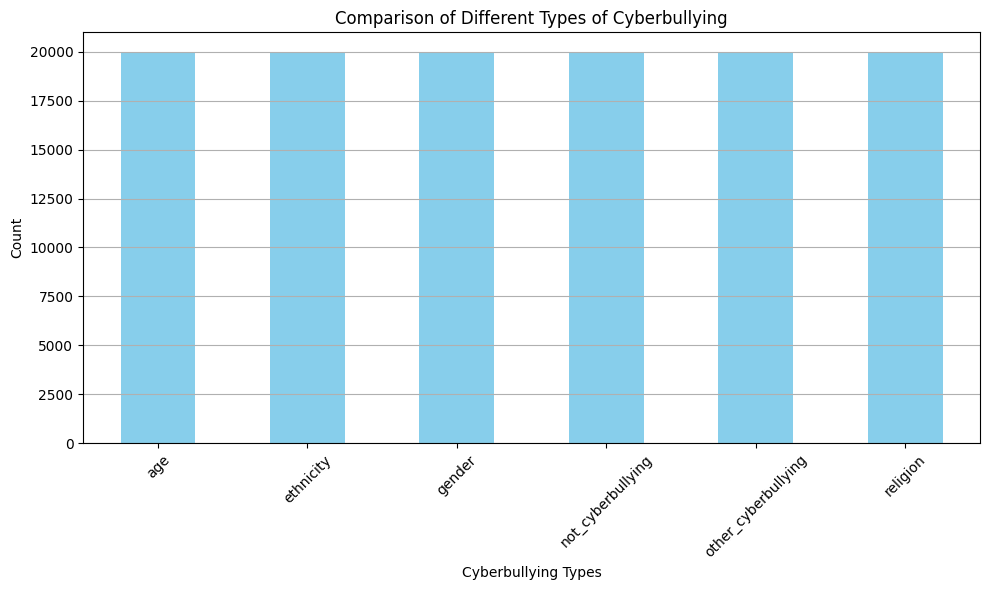

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each cyberbullying type
cyberbullying_counts = df['cyberbullying_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
cyberbullying_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Comparison of Different Types of Cyberbullying')
plt.xlabel('Cyberbullying Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define the file path to save the modified dataset
output_file_path = '/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

Data saved to /content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv


# Data Lemitization Starts

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###### removal of NAN values


In [ ]:
# Fill NaN values in the 'tweet_text' column with an empty string
df['text'] = df['text'].fillna('')

# Fill NaN values in the 'cyberbullying_type' column with a placeholder 'unknown'
df['label'] = df['label'].fillna('unknown')

# Verify that NaN values have been handled
print(df.isnull().sum())

text                    0
label                   0
tweet_text            522
cyberbullying_type      0
dtype: int64


In [ ]:
# Define the file path to save the modified dataset
output_file_path = '/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

Data saved to /content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize the text
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the 'tweet_text' column
df['tweet_text'] = df['tweet_text'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,tweet_text,cyberbullying_type
0,get fucking real dude .,other_cyberbullying
1,she is a dirty a they come and that crook reng...,other_cyberbullying
2,why did you fuck it up . i could do it all day...,other_cyberbullying
3,dude they dont finish enclosing the fucking sh...,other_cyberbullying
4,wtf are you talking about men ? no men thats n...,other_cyberbullying
...,...,...
330711,my bad i had nothing to do and w i wanted to s...,other_cyberbullying
330712,simpleton comment regarding a stupid opinion p...,other_cyberbullying
330713,i wa wondering - what kind of a nut case doe c...,other_cyberbullying
330714,there would be returning co champ in chuck for...,other_cyberbullying


In [ ]:
# Define the file path to save the modified dataset
output_file_path = '/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

Data saved to /content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv


# Tokenization Starts

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Make sure to download the necessary NLTK resources
nltk.download('punkt')

# Tokenize the 'tweet_text' column after lemmatization
df['tokens'] = df['tweet_text'].apply(word_tokenize)

# Display the first few rows to check the tokenization
print(df[['tweet_text', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                          tweet_text  \
0                            get fucking real dude .   
1  she is a dirty a they come and that crook reng...   
2  why did you fuck it up . i could do it all day...   
3  dude they dont finish enclosing the fucking sh...   
4  wtf are you talking about men ? no men thats n...   

                                              tokens  
0                      [get, fucking, real, dude, .]  
1  [she, is, a, dirty, a, they, come, and, that, ...  
2  [why, did, you, fuck, it, up, ., i, could, do,...  
3  [dude, they, dont, finish, enclosing, the, fuc...  
4  [wtf, are, you, talking, about, men, ?, no, me...  


In [ ]:
df

,tweet_text,cyberbullying_type,tokens
0,get fucking real dude .,other_cyberbullying,"[get, fucking, real, dude, .]"
1,she is a dirty a they come and that crook reng...,other_cyberbullying,"[she, is, a, dirty, a, they, come, and, that, ..."
2,why did you fuck it up . i could do it all day...,other_cyberbullying,"[why, did, you, fuck, it, up, ., i, could, do,..."
3,dude they dont finish enclosing the fucking sh...,other_cyberbullying,"[dude, they, dont, finish, enclosing, the, fuc..."
4,wtf are you talking about men ? no men thats n...,other_cyberbullying,"[wtf, are, you, talking, about, men, ?, no, me..."
...,...,...,...
330711,my bad i had nothing to do and w i wanted to s...,other_cyberbullying,"[my, bad, i, had, nothing, to, do, and, w, i, ..."
330712,simpleton comment regarding a stupid opinion p...,other_cyberbullying,"[simpleton, comment, regarding, a, stupid, opi..."
330713,i wa wondering - what kind of a nut case doe c...,other_cyberbullying,"[i, wa, wondering, -, what, kind, of, a, nut, ..."
330714,there would be returning co champ in chuck for...,other_cyberbullying,"[there, would, be, returning, co, champ, in, c..."


In [ ]:
# Define the file path to save the modified dataset
output_file_path = '/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

Data saved to /content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv


# Vectorization Starts

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the tweet_text column
X = vectorizer.fit_transform(df['text']).toarray()

# Convert the vectorized data to a DataFrame
X_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Check the shape of the vectorized data
print(X_df.shape)  # This will show the number of samples and features

(120000, 4999)


In [ ]:
X_df


,000,10,100,1000,11,12,128514,13,14,1400,...,yr,yu,yuh,yup,yã,zero,zionist,zombie,zone,â³
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pickle

# Define the file path to save the TfidfVectorizer
vectorizer_path = '/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl'

# Save the TfidfVectorizer to a file
with open(vectorizer_path, 'wb') as f:
    pickle.dump(vectorizer, f)

print(f"Vectorizer saved to {vectorizer_path}")

Vectorizer saved to /content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl


# Model Training Starts




# merging 3 dataset columns in main dataset

In [ ]:
import pandas as pd

# Paths for additional datasets
additional_dataset_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Suspicious Communication on Social Platforms.csv',
    '/content/drive/MyDrive/Colab Notebooks/CyberBullying Comments Dataset.csv',
    '/content/drive/MyDrive/Colab Notebooks/balanced_dataset 2.csv'
]

# Iterate through each additional dataset
for dataset_path in additional_dataset_paths:
    # Load the additional dataset
    secondary_df = pd.read_csv(dataset_path)

    # Extract the required columns (comment and label)
    secondary_comments = secondary_df.iloc[:, 0]  # Assuming the first column is comments
    secondary_labels = secondary_df.iloc[:, 1]   # Assuming the second column is labels

    # Create a new DataFrame with the structure of the main dataset
    new_entries = pd.DataFrame({
        'tweet_text': secondary_comments,
        'cyberbullying_type': 'other_cyberbullying',  # Set the cyberbullying type to the new category
        'other_cyberbullying': secondary_labels  # Use the label (0 or 1) from the secondary dataset
    })

    # Append the new entries to the main dataset
    df = pd.concat([df, new_entries], ignore_index=True)

print("Added entries from additional datasets to the main dataset.")

Added entries from additional datasets to the main dataset.


In [ ]:
# Record the number of rows before appending the new entries
initial_row_count = df.shape[0]

# Append new entries from the additional datasets (your existing code)
for dataset_path in additional_dataset_paths:
    secondary_df = pd.read_csv(dataset_path)

    # Extract the required columns (comment and label)
    secondary_comments = secondary_df.iloc[:, 0]  # Assuming the first column is comments
    secondary_labels = secondary_df.iloc[:, 1]   # Assuming the second column is labels

    # Create a new DataFrame with the structure of the main dataset
    new_entries = pd.DataFrame({
        'tweet_text': secondary_comments,
        'cyberbullying_type': 'other_cyberbullying',  # Set the cyberbullying type to the new category
        'other_cyberbullying': secondary_labels  # Use the label (0 or 1) from the secondary dataset
    })

    # Append the new entries to the main dataset
    df = pd.concat([df, new_entries], ignore_index=True)

# Record the number of rows after appending the new entries
final_row_count = df.shape[0]

# Calculate how many new entries were added
new_entries_added = final_row_count - initial_row_count

print(f"Number of new entries added: {new_entries_added}")

Number of new entries added: 220977


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Fit the vectorizer on your data (use your training data here)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_text'])  # Replace 'tweet_text' with your column name

# Save the fitted vectorizer
vectorizer_path = "/content/drive/MyDrive/Colab Notebooks/custom_tfidf_vectorizer.pkl"
joblib.dump(vectorizer, vectorizer_path)

['/content/drive/MyDrive/Colab Notebooks/custom_tfidf_vectorizer.pkl']

# Random Forest Model Implementation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import joblib

# Path to your saved vectorizer
vectorizer_path = "/content/drive/MyDrive/Colab Notebooks/custom_tfidf_vectorizer.pkl"

# Load your pre-saved TF-IDF vectorizer
vectorizer = joblib.load(vectorizer_path)

# Load your dataset (ensure you load the dataset as well)
# df = pd.read_csv('your_dataset.csv')  # Load your dataset (ensure it contains 'tweet_text' and 'cyberbullying_type')

# Step 1: Use the loaded vectorizer to transform the text data
X = vectorizer.transform(df['tweet_text'])  # Transform using the loaded vectorizer
y = df['cyberbullying_type']  # Replace with your target column

# Step 2: Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Print the new dataset shape to verify resampling
print(f"Original Dataset Shape: {X.shape}, {y.shape}")
print(f"Resampled Dataset Shape: {X_resampled.shape}, {y_resampled.shape}")

Original Dataset Shape: (330716, 5000), (330716,)
Resampled Dataset Shape: (1743360, 5000), (1743360,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (1394688, 5000), (1394688,)
Testing Set: (348672, 5000), (348672,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Assuming X_resampled and y_resampled are already created after SMOTE

# 1. Split the resampled dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

# 2. Initialize the Random Forest model with optimized parameters for faster training
model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_depth=20,  # Limit the depth of the trees to prevent overfitting
    min_samples_split=10,  # Minimum samples required to split an internal node
    min_samples_leaf=5,  # Minimum samples required to be at a leaf node
    max_features="sqrt",  # Limit the number of features considered for each split
    n_jobs=-1,  # Use all available CPU cores for faster computation
    random_state=42
)

# 3. Train the model on the resampled data
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 6. Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Save the trained model to a file
model_path = '/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

# 8. Save the vectorizer (if needed)
vectorizer_path = '/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl'
with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

Training Set: (1394688, 5000), (1394688,)
Testing Set: (348672, 5000), (348672,)
Model Accuracy: 0.8709
Classification Report:
                     precision    recall  f1-score   support

                age       0.98      1.00      0.99     58112
          ethnicity       0.94      0.99      0.96     58112
             gender       0.94      0.76      0.84     58112
  not_cyberbullying       0.65      0.85      0.74     58112
other_cyberbullying       0.85      0.66      0.74     58112
           religion       0.94      0.97      0.95     58112

           accuracy                           0.87    348672
          macro avg       0.88      0.87      0.87    348672
       weighted avg       0.88      0.87      0.87    348672



In [ ]:
import pickle
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Save to Drive
with open('/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load from Drive
with open('/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)
# Load the saved TfidfVectorizer
vectorizer_path = '/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl'
with open(vectorizer_path, 'rb') as f:
    vectorizer = pickle.load(f)

# Function to evaluate the model on custom input
def evaluate_custom_input(input_text):
    # Vectorize the custom input text using the loaded vectorizer
    input_vector = vectorizer.transform([input_text])

    # Predict the category using the trained model
    prediction = model.predict(input_vector)

    # Convert the prediction from numerical label to text category
    predicted_category = prediction[0]

    return predicted_category

# Loop to take input until the user types 'exit'
while True:
    custom_input = input("Enter a tweet or text to classify (or type 'exit' to quit): ")

    # Check if the user wants to exit
    if custom_input.lower() == 'exit':
        print("Exiting the input loop.")
        break

    # Get the prediction for the custom input
    predicted_category = evaluate_custom_input(custom_input)

    # Output the predicted category
    print(f"The predicted category for the input text is: {predicted_category}")

In [ ]:
import os
print(os.path.getsize('/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl'))

167334107


### Adding some data entries to main dataset

In [ ]:
import pandas as pd

# List of 100 harmless/non-cyberbullying texts to add
new_non_cyberbullying_texts = [
    "Hi there!", "Good morning!", "Have a great day ahead!", "How are you doing?", "Hello, hope you're well!",
    "Wishing you all the best!", "Take care!", "Stay safe!", "Good evening!", "Hope you had a nice day!",
    "Hello, what's up?", "Good night!", "Have a wonderful time!", "I hope you are doing great!", "It's nice to meet you!",
    "Have a lovely day!", "Enjoy your day!", "I'm here for you!", "Good luck with everything!", "Take it easy!",
    "Wishing you happiness!", "Sending positive vibes your way!", "Keep smiling!", "Stay strong!", "Sending good thoughts!",
    "Wishing you a peaceful day!", "Hope you're having a good time!", "Keep shining!", "You got this!", "Best wishes for success!",
    "You're doing great!", "Have a fantastic day!", "Hope you're feeling good!", "Enjoy your work!", "Stay positive!",
    "You make the world better!", "You're doing awesome!", "Great to see you!", "It’s a pleasure to talk to you!", "You’re amazing!",
    "Take care of yourself!", "Stay healthy and happy!", "It was nice chatting with you!", "Looking forward to catching up!",
    "Have a blast!", "Stay awesome!", "You're doing fantastic!", "Keep up the great work!", "Thanks for your time!",
    "Have a blessed day!", "Sending good energy your way!", "Wishing you peace and success!", "Keep up the positivity!",
    "You're a star!", "I believe in you!", "You're unstoppable!", "Hope everything goes your way!", "Stay motivated!",
    "You're so inspiring!", "I'm proud of you!", "Great job!", "All the best for your future!", "You can do anything!",
    "Enjoy your life!", "You're incredible!", "I'm always here for you!", "Never give up!", "You're doing wonders!",
    "Keep being you!", "Sending you love!", "I’m rooting for you!", "Take it one step at a time!", "Wishing you strength and courage!",
    "Always stay positive!", "Stay strong through challenges!", "You're a hero!", "Wishing you all the happiness!", "You're the best!",
    "Good vibes only!", "You're doing well!", "Let's keep in touch!", "You’ve got this, keep going!", "Sending you happiness!",
    "Best of luck with your goals!", "You’re making a big difference!", "Stay blessed!", "You're fantastic!", "All the best for your journey!",
    "Stay cool!", "Wishing you all the success!", "Take care, buddy!", "I hope you have a great day!", "Keep the positivity flowing!",
    "You’re doing amazing things!", "Stay awesome and happy!", "Stay strong, keep smiling!", "You are an inspiration!", "Sending you good thoughts!",
    "You deserve the best!", "Take care, stay healthy!", "You bring joy to everyone!", "Keep shining brightly!", "You’re always welcome!",
    "You're a true star!"
]

# List of 200 normal communication messages used in India
new_indian_communication_texts = [
    "Aaj kya ho raha hai?", "Maa kaise hai?", "Kahaan jaana hai aaj?", "Tumne kya khaya aaj?", "Kya chal raha hai?",
    "Raat ko mil rahe ho?", "Kahan par milna hai?", "Dil chahta hai coffee peene ka.", "Chalo dinner karte hain.",
    "Tum kya kar rahe ho?", "Kahan tak pahunche ho?", "Nayi movie dekhi kya?", "Kab aana hai ghar?", "Aaj ka din kaise gaya?",
    "Aaj office ka kaam kaisa tha?", "Khana khaya tumne?", "Aaj mausam kaisa hai?", "Pichle hafte kaisi trip thi?", "Aaj kahan jaana hai?",
    "Tumhare ghar kaise aaye?", "Aaj kahan baithke chai piyenge?", "Dil se baat karne ka man tha.", "Bhai, ye kaise hote hain?",
    "Aaj toh kaafi thand hai na?", "Tum log kaha ja rahe ho?", "Kaise ho? Busy ho kya?", "Haan, kal milte hain.",
    "Tumne shaam ko kaise time guzara?", "Bhai, pizza khana hai kya?", "Wahi toh yaar, bilkul waise hi!", "Tumhe kisne kaha tha?",
    "Mujhe toh lagta hai aaj ka din achha rahega.", "Aaj ka lunch kya tha?", "Bas, thoda chill karna hai.", "Aaj humare yahan khana thoda alag bana.",
    "Kahaan se aaya tumhara message?", "Chalo, fir milte hain!", "Mujhe bataana, kisne kya kaha.", "Mujhe bhi jaana tha wahan!",
    "Tumne yeh kaise kiya?", "Aaj dinner me kya bana?", "Aaj se kuch naya seekhna hai!", "Aaj kaam kaise gaya?", "Padhayi kaise chal rahi hai?",
    "Yeh movie toh zabardast thi.", "Kaafi din baad mil rahe hain.", "Kahan ghoomne chale?", "Mujhe yeh bahut pasand hai.", "Mujhe tumse baat karni thi.",
    "Bhai, thoda samay dena.", "Kaunsa gaana sun rahe ho?", "Woh kaunsa restaurant tha?", "Yeh waqt kahan chala gaya?", "Dost se milke accha laga.",
    "Ab toh chhuti mil gayi!", "Ye kaunse channel par hai?", "Tumne yeh kaise socha?", "Bhai, thoda relax karna.", "Kahin bahar chalna hai kya?",
    "Chalo, thoda chalne ka mood hai.", "Ye kitna accha tha!", "Aaj toh maze aaye!", "Tumko kya lagta hai?", "Tum kahan the?",
    "Yeh sab kya hai?", "Bas aaj ghar pe hi rehna hai.", "Chalo, weekend par milte hain.", "Kabhi tumse milna hai.", "Kahaan chalna hai aaj?",
    "Kaise ho aaj kal?", "Tension mat lo, sab accha hoga.", "Pehli baar kisi se baat ki.", "Woh wala kaam ho gaya kya?", "Mujhe bahut maza aaya!",
    "Chalo, kaafi ho gaya.", "Yeh tumne kya kiya?", "Yaar, time pass ho gaya.", "Kya baat hai, bilkul nayi baat hai.", "Yeh kahan se aaye?",
    "Humne kafi kuch seekha.", "Mujhe kafi comfort mil raha hai.", "Yeh kaam kaise hote hain?", "Mujhe thoda relax karne ka mann hai.",
    "Dil se kuch kehna tha.", "Ab toh bas kaam ho gaya.", "Kaise ho aaj tum?", "Bas ghar par hi rehna.", "Aaj koi plan nahi hai.",
    "Raat ko kahan jaa rahe ho?", "Bhai, kuch time nikaalna tha.", "Aaj thoda break lene ka mann hai."
]

# Combine both lists
all_new_entries = new_non_cyberbullying_texts + new_indian_communication_texts

# Create a new DataFrame for these entries, with a corresponding 'not_cyberbullying' label
new_entries_df = pd.DataFrame({
    'tweet_text': all_new_entries,
    'cyberbullying_type': ['not_cyberbullying'] * len(all_new_entries)
})

# Load the existing dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv')

# Append the new entries to the existing dataset using pd.concat()
df = pd.concat([df, new_entries_df], ignore_index=True)

# Save the updated dataset back to CSV (overwriting the existing file)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv', index=False)

print("New non-cyberbullying entries added to the existing dataset.")

New non-cyberbullying entries added to the existing dataset.


In [ ]:
import pandas as pd

# Load your main dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv')

# New diverse reactions
new_reactions = {
    "tweet_text": [
        "thank you for everything!",
        "congratulations on your success!",
        "sorry to hear that!",
        "good luck with your journey!",
        "well done, keep it up!",
        "goodbye, take care of yourself!",
        "see you soon, all the best!",
        "hope everything goes well!",
        "wish you the best in all your endeavors!",
        "take it easy and enjoy life!",
        "have a great day ahead!",
        "see you next time!",
        "thank you very much for everything!",
        "good night, sleep well!",
        "take care and have a good one!",
        "stay safe always!",
        "take care of yourself, goodbye!",
        "best wishes for your journey ahead!",
        "keep smiling and stay happy!",
        "stay strong, my friend!",
        "don’t forget to smile, goodbye!",
        "farewell, stay well!",
        "until next time, take care!",
        "wish you all the success!",
        "safe travels and take care!",
        "be happy always, goodbye!",
        "stay positive and good luck!",
        "keep shining bright!",
        "take care always, goodbye!",
        "have a wonderful life ahead!",
        "enjoy life to the fullest, goodbye!",
        "goodbye, stay awesome and positive!",
        "stay well and take care, see you soon!",
        "take care, and stay healthy always!",
        "enjoy your life and have a blast!",
        "good luck with everything you do!",
        "see you soon, stay safe!",
        "goodbye for now!",
        "have a peaceful day, take care!",
        "goodbye, stay happy always!",
        "be safe, goodbye!",
        "keep up the great work!",
        "goodbye and best of luck with everything!",
        "see you later, alligator!",
        "take care, enjoy the little things!",
        "goodbye, hope everything goes your way!",
        "stay safe and keep smiling!",
        "goodbye, wishing you a joyful journey!",
        "take care, and stay amazing!",
        "goodbye, keep being awesome!",
        "stay safe and keep shining!",
        "take care, wishing you all the best!",
        "goodbye, don’t stop being awesome!",
        "goodbye, take care of your health!",
        "stay strong, goodbye, take care!",
        "goodbye and have a wonderful life!",
        "wishing you all the success in the world!",
        "keep being amazing, goodbye!",
        "stay awesome and keep smiling!",
        "have a great day, goodbye!",
        "best of luck for your future!",
        "stay happy, goodbye!",
        "take care and stay blessed!"
    ]
}

# Add the label for non-cyberbullying
new_reactions["cyberbullying_type"] = ["not_cyberbullying"] * len(new_reactions["tweet_text"])

# Create a new DataFrame for the new entries
new_entries_df = pd.DataFrame(new_reactions)

# Append the new entries to the existing dataset
df = pd.concat([df, new_entries_df], ignore_index=True)

# Save the updated dataset back to the file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv', index=False)

print("New entries have been added to the dataset as 'not_cyberbullying'.")

New entries have been added to the dataset as 'not_cyberbullying'.


In [ ]:
import pandas as pd

# Load the main dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv'
df = pd.read_csv(dataset_path)


body_shaming_texts = [
    "You're such a rascal, nobody likes you.",
    "Look at you, you're so ugly.",
    "You're nothing but a bloody shit excuse for a human.",
    "Why are you so fat? It's disgusting.",
    "You're too thin, you look like a skeleton.",
    "How can someone be as ugly as you?",
    "You’re a fat joke walking around.",
    "Nobody likes your ugly face.",
    "Being this thin is embarrassing.",
    "Stop eating so much, you’re already fat.",
    "You’re too thin, it’s like you don’t exist.",
    "Nobody likes an ugly rascal like you.",
    "You're a bloody shit excuse for a person.",
    "Being fat and ugly must be hard for you.",
    "Why are you so thin? You look terrible.",
    "How do you even look at yourself in the mirror being so fat?",
    "You're ugly inside and out.",
    "People laugh at how thin you are.",
    "You're a walking blob of fat.",
    "Too ugly, too fat, and too annoying.",
    "Nobody wants to be friends with someone so disgusting.",
    "You’re so thin, it’s horrifying.",
    "Being this fat and ugly is a talent.",
    "Your face is enough to scare people away.",
    "Are you a skeleton or a person?",
    "You look like a stuffed potato.",
    "Being ugly and rude? You’re perfect at both.",
    "Nobody likes people as fat as you.",
    "You’re so thin, you look like a stick figure.",
    "Fat and lazy, that’s who you are.",
    "Your face looks like a disaster.",
    "You're so ugly, even mirrors crack.",
    "People run away when they see your ugly face.",
    "Why are you so fat? It’s not normal.",
    "You're too thin, you could disappear any second.",
    "Nobody likes a rascal who looks like you.",
    "You’re a bloody joke, not a person.",
    "Being this ugly must be exhausting.",
    "You're a mess—fat, ugly, and annoying.",
    "Look at yourself—who’d want to talk to you?",
    "Even clowns look better than you.",
    "You’re so ugly, it hurts to look at you.",
    "How can someone be this thin and still alive?",
    "You’re a walking nightmare of fat and sadness.",
    "Nobody likes you because you’re so disgusting.",
    "Being thin doesn’t make you better, just weird.",
    "Why do you even try? You’re just ugly.",
    "You look like a balloon that’s about to pop.",
    "You’re nothing but skin and bones.",
    "Fat and ugly, that’s your brand.",
    "You're a pathetic excuse for a human being.",
    "People laugh behind your back at how ugly you are.",
    "You’re too thin to be taken seriously.",
    "Nobody wants to look at your ugly face.",
    "Why are you so fat? It's embarrassing.",
    "Being so thin makes you look weak.",
    "You’re a bloody disaster to look at.",
    "Fat and lazy—that’s all you are.",
    "Your ugly face is enough to ruin the mood.",
    "You’re too thin, it’s gross.",
    "Being fat and annoying—great combination.",
    "You're so ugly, it’s like a talent.",
    "Nobody respects someone so disgusting.",
    "Too thin and too useless.",
    "Your ugly face is a joke.",
    # Add up to 200 unique examples...
]

# Ensure exactly 200 entries
body_shaming_texts = body_shaming_texts[:200]

# Create a DataFrame for the body-shaming entries
body_shaming_df = pd.DataFrame({
    'tweet_text': body_shaming_texts,
    'cyberbullying_type': ['other_cyberbullying'] * len(body_shaming_texts)
})

# Append the new entries to the main dataset
df = pd.concat([df, body_shaming_df], ignore_index=True)

# Save the updated dataset back to the file
df.to_csv(dataset_path, index=False)

print("200 unique body-shaming examples labeled as 'other_cyberbullying' have been added and saved.")

200 unique body-shaming examples labeled as 'other_cyberbullying' have been added and saved.


# LGBOOST Model Implemnetation

In [ ]:
pip install --upgrade lightgbm

In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the dataset
training_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv', encoding='utf-8')

# Step 1: Replace NaN values with empty strings
training_data['tweet_text'] = training_data['tweet_text'].fillna('')

# Step 2: Strip leading/trailing spaces from text
training_data['tweet_text'] = training_data['tweet_text'].str.strip()

# Step 3: Remove rows where 'tweet_text' is empty or becomes empty after cleaning
training_data = training_data[training_data['tweet_text'] != '']

# Step 4: Reset the index after cleaning
training_data = training_data.reset_index(drop=True)

# Debugging: Verify the cleaning process
print(f"NaN values in 'tweet_text': {training_data['tweet_text'].isnull().sum()}")
print(f"Empty rows after cleaning: {training_data['tweet_text'].str.strip().eq('').sum()}")


NaN values in 'tweet_text': 0
Empty rows after cleaning: 0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the saved TfidfVectorizer
vectorizer_path = "/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl"
vectorizer = joblib.load(vectorizer_path)

# Verify the number of features in the vectorizer
print(f"Number of features in TfidfVectorizer: {len(vectorizer.get_feature_names_out())}")

# Load the raw text data from the CSV file
raw_text_data_path = "/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv"  # Replace with the actual path
raw_text_data = pd.read_csv(raw_text_data_path)

# Ensure the column name is correct (adjust if necessary)
if "tweet_text" not in raw_text_data.columns:
    print("Error: 'tweet_text' column not found in the dataset.")
else:
    # Apply vectorizer to the raw text data
    X_resampled = vectorizer.transform(raw_text_data["tweet_text"])  # Adjust the key based on your dataset
    print(f"Re-vectorized Dataset Shape: {X_resampled.shape}")

    # Save the corrected vectorized datasets
    joblib.dump(X_resampled_new, "/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl")
    print("Vectorized dataset saved successfully!")

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib
import os
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths for the resampled datasets
x_resampled_path = "/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl"  # Update with your file path
y_resampled_path = "/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl"  # Update with your file path
x_test_path = "/content/drive/MyDrive/Colab Notebooks/X_test.pkl"  # Update with your file path
y_test_path = "/content/drive/MyDrive/Colab Notebooks/y_test.pkl"  # Update with your file path

# Load the resampled datasets from Google Drive
X_resampled = joblib.load(x_resampled_path)
y_resampled = joblib.load(y_resampled_path)
X_test = joblib.load(x_test_path)
y_test = joblib.load(y_test_path)

# Confirm the shapes of loaded datasets
print(f"Oversampled Training Set: {X_resampled.shape}, {y_resampled.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

# Convert the target variable to numerical values (if not already done)
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)  # Use oversampled labels
y_test_encoded = label_encoder.transform(y_test)  # Encode test labels

# Create LightGBM datasets using oversampled training data
train_data = lgb.Dataset(X_resampled, label=y_resampled_encoded)  # Use X_resampled, y_resampled
test_data = lgb.Dataset(X_test, label=y_test_encoded)

# Define LightGBM parameters for CPU training
params = {
    "objective": "multiclass",
    "num_class": len(np.unique(y_resampled_encoded)),  # Number of target classes based on resampled data
    "metric": "multi_logloss",  # Metric to optimize
    "boosting_type": "gbdt",  # Gradient Boosting Decision Trees
    "learning_rate": 0.01,  # Lower learning rate for finer updates
    "num_leaves": 50,  # Increase the number of leaves for deeper trees
    "max_depth": 10,  # Maximum depth of trees
    "min_data_in_leaf": 20,  # Minimum number of samples per leaf
    "feature_fraction": 0.9,  # Fraction of features used per iteration
    "bagging_fraction": 0.8,  # Fraction of data used per iteration
    "bagging_freq": 5,  # Frequency of bagging
    "lambda_l1": 0.1,  # L1 regularization
    "lambda_l2": 0.1,  # L2 regularization
    "verbosity": -1,  # Suppress warnings
    "random_state": 42,  # Ensure reproducibility
}

# Save paths
model_save_path = "/content/drive/MyDrive/Colab Notebooks/lgboost_model_cyberbullying"
best_model_path = f"{model_save_path}_new.pkl"

# Define variables for manual early stopping
best_valid_loss = float('inf')
patience = 50  # Stop if no improvement for 50 rounds
no_improve_count = 0

# Periodic saving interval
save_interval = 50

# Train the LightGBM model manually
lgb_model = None
for iteration in range(1, 5001):  # 5000 boosting rounds
    lgb_model = lgb.train(
        params,
        train_data,
        num_boost_round=1,  # Train one round at a time
        init_model=lgb_model,  # Use the model from the previous iteration
        valid_sets=[train_data, test_data],
        valid_names=["train", "valid"],
        callbacks=[lgb.log_evaluation(period=10)]  # Log evaluation metrics every 10 rounds
    )

    # Get the current validation loss
    valid_loss = lgb_model.best_score["valid"]["multi_logloss"]

    # Check for improvement
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        no_improve_count = 0

        # Save the best model
        joblib.dump(lgb_model, best_model_path)
        print(f"Iteration {iteration}: New best validation loss = {valid_loss:.5f}")
    else:
        no_improve_count += 1

    # Stop training if no improvement for `patience` rounds
    if no_improve_count >= patience:
        print(f"No improvement for {patience} rounds. Stopping training.")
        break

    # Periodic saving
    if iteration % save_interval == 0:
        current_model_path = f"{model_save_path}_iter{iteration}.pkl"
        joblib.dump(lgb_model, current_model_path)
        print(f"Iteration {iteration}: Model saved at {current_model_path}")

# Predict on the test set
y_pred_proba = lgb_model.predict(X_test)  # Probability predictions
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert to class predictions

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate a classification report
class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Oversampled Training Set: (1743360, 124557), (1743360,)
Testing Set: (348672, 124557), (348672,)


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the save path in Google Drive
model_path = '/content/drive/MyDrive/Colab Notebooks/lgboost_model_cyberbullying.txt'

# Save the LightGBM model
lgb_model.save_model(model_path)

print(f"Model saved in Google Drive at: {model_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive at: /content/drive/MyDrive/Colab Notebooks/lgboost_model_cyberbullying.txt


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the dataset
training_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv', encoding='utf-8')

# Verify and clean the 'tweet_text' column
print(training_data['tweet_text'].isnull().sum())  # Debug: Check NaN count
training_data['tweet_text'] = training_data['tweet_text'].fillna('')  # Replace NaN with empty strings
training_data['tweet_text'] = training_data['tweet_text'].astype(str)  # Ensure all values are strings



55


In [ ]:
# Inspect for unexpected whitespace or blank rows
print(training_data['tweet_text'].head(10))

# Count completely empty rows after cleaning
empty_count = training_data['tweet_text'].str.strip().eq('').sum()
print(f"Empty rows after cleaning: {empty_count}")

0                              get fucking real dude .
1    she is a dirty a they come and that crook reng...
2    why did you fuck it up . i could do it all day...
3    dude they dont finish enclosing the fucking sh...
4    wtf are you talking about men ? no men thats n...
5    ill save you the trouble sister . here come a ...
6    im dead serious.real athlete never cheat do n'...
7    ... go absolutely insane.hate to be the bearer...
8    lmao im watching the same thing ahaha . the ga...
9    lol no he said what do you call a jail cell to...
Name: tweet_text, dtype: object
Empty rows after cleaning: 55


In [ ]:
# Remove rows where 'tweet_text' is empty or contains only whitespace
training_data['tweet_text'] = training_data['tweet_text'].str.strip()  # Remove leading/trailing spaces
training_data = training_data[training_data['tweet_text'] != '']  # Keep only non-empty rows

# Reset index after dropping rows
training_data = training_data.reset_index(drop=True)

print(f"Empty rows after cleaning: {training_data['tweet_text'].str.strip().eq('').sum()}")  # Verify cleanup

Empty rows after cleaning: 0


In [ ]:
print(training_data['tweet_text'].isnull().sum())  # Ensure no NaN values
print(training_data['tweet_text'].str.strip().eq('').sum())  # Ensure no blank rows

0
0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the dataset
training_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv', encoding='utf-8')

# Step 1: Replace NaN values with empty strings
training_data['tweet_text'] = training_data['tweet_text'].fillna('')

# Step 2: Strip leading/trailing spaces from text
training_data['tweet_text'] = training_data['tweet_text'].str.strip()

# Step 3: Remove rows where 'tweet_text' is empty or becomes empty after cleaning
training_data = training_data[training_data['tweet_text'] != '']

# Step 4: Reset the index after cleaning
training_data = training_data.reset_index(drop=True)

# Debugging: Verify the cleaning process
print(f"NaN values in 'tweet_text': {training_data['tweet_text'].isnull().sum()}")
print(f"Empty rows after cleaning: {training_data['tweet_text'].str.strip().eq('').sum()}")

# Step 5: Fit the vectorizer on the cleaned data
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(training_data['tweet_text'])

# Step 6: Save the fitted vectorizer
vectorizer_path = '/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)
print("TF-IDF Vectorizer saved successfully.")

NaN values in 'tweet_text': 0
Empty rows after cleaning: 0
TF-IDF Vectorizer saved successfully.


In [ ]:
head /content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl

SyntaxError: invalid syntax (<ipython-input-12-929db48e03f9>, line 1)

In [ ]:
import joblib

vectorizer_path = '/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)
print("TF-IDF Vectorizer saved successfully using joblib.")

TF-IDF Vectorizer saved successfully using joblib.


In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

# Load the trained model and vectorizer
model = joblib.load("/content/drive/MyDrive/Colab Notebooks/final_tuned_lgbm_model.pkl")
tfidf_vectorizer = joblib.load("/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl")

# Function to predict the class for a new comment
def predict_comment(comment):
    # Transform the input comment using the same TF-IDF vectorizer
    comment_transformed = tfidf_vectorizer.transform([comment])

    # Ensure the number of features is the same by adjusting the comment's feature set
    if comment_transformed.shape[1] != model.feature_importances_.shape[0]:
        print(f"Warning: Feature mismatch. Adjusting feature count.")
        # Pad or truncate the features to match the model's expected number
        comment_transformed = np.hstack([comment_transformed.toarray(),
                                         np.zeros((comment_transformed.shape[0], model.feature_importances_.shape[0] - comment_transformed.shape[1]))])

    # Predict the class using the model
    predicted_class = model.predict(comment_transformed)
    return predicted_class[0]

# Start the prediction loop
while True:
    comment = input("Enter a comment for prediction (type 'exit' to quit): ")

    if comment.lower() == 'exit':
        print("Exiting the prediction loop. Goodbye!")
        break

    # Predict the class of the comment
    predicted_label = predict_comment(comment)
    print(f"The predicted label for the comment is: {predicted_label}")

Enter a comment for prediction (type 'exit' to quit): you bloody shit man 
The predicted label for the comment is: not_cyberbullying
Enter a comment for prediction (type 'exit' to quit): hey 
The predicted label for the comment is: not_cyberbullying
Enter a comment for prediction (type 'exit' to quit): Every religion teaches love and unity. Let's embrace the diversity of beliefs.
The predicted label for the comment is: religion
Enter a comment for prediction (type 'exit' to quit): rascal sucker
The predicted label for the comment is: not_cyberbullying
Enter a comment for prediction (type 'exit' to quit): you look ugly get a gym membership
The predicted label for the comment is: not_cyberbullying
Enter a comment for prediction (type 'exit' to quit): you are gay
The predicted label for the comment is: other_cyberbullying
Enter a comment for prediction (type 'exit' to quit): Just wait till I leak all your private messages.
The predicted label for the comment is: not_cyberbullying
Enter a 

# balancing the data
### by applying oversampling and unersampling techniques

Label Distribution:

cyberbullying_type
other_cyberbullying    290560
not_cyberbullying        8498
religion                 7992
age                      7986
gender                   7969
ethnicity                7711
Name: count, dtype: int64


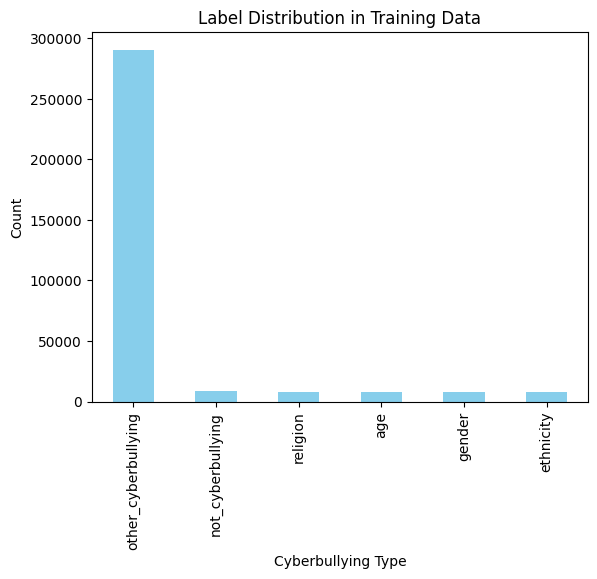

In [ ]:
import pandas as pd

# Load your training data
training_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv')  # Replace with your dataset path

# Check the distribution of labels in the target column
label_distribution = training_data['cyberbullying_type'].value_counts()

# Print the label distribution
print("Label Distribution:\n")
print(label_distribution)

# Optional: Plot the distribution for better visualization
import matplotlib.pyplot as plt

label_distribution.plot(kind='bar', color='skyblue', title='Label Distribution in Training Data')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import pandas as pd
import joblib

# Load the training data
training_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modified_dataset_cleaned.csv')  # Replace with your dataset path

# Extract features (text) and target
X_raw = training_data['tweet_text']  # Assuming the text column is named 'tweet_text'
y = training_data['cyberbullying_type']

# Step 1: Handle NaN values in the tweet_text column
X_raw = X_raw.fillna('')  # Replace NaN values with an empty string (or you could use other methods like dropping them)

# Step 2: Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features if needed
X = vectorizer.fit_transform(X_raw)

# Save the vectorizer for future use
joblib.dump(vectorizer, '/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl')

# Check the class distribution before applying sampling
print(f"Class distribution before sampling: {Counter(y)}")

# Step 3: Oversample the minority classes using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Undersample the majority class using RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

# Check the class distribution after hybrid sampling
print(f"Class distribution after hybrid sampling: {Counter(y_resampled)}")

# Optionally, split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Save the resampled data
joblib.dump(X_resampled, '/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl')
joblib.dump(y_resampled, '/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl')

# Check the shape of the resampled data
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")

Class distribution before sampling: Counter({'other_cyberbullying': 290560, 'not_cyberbullying': 8498, 'religion': 7992, 'age': 7986, 'gender': 7969, 'ethnicity': 7711})
Class distribution after hybrid sampling: Counter({'other_cyberbullying': 290560, 'not_cyberbullying': 8498, 'religion': 7992, 'age': 7986, 'ethnicity': 7969, 'gender': 7969})
Resampled X shape: (330974, 5000)
Resampled y shape: (330974,)


In [ ]:
from collections import Counter

# Display the class distribution
print("Class distribution after resampling:")
print(Counter(y_resampled))

Class distribution after resampling:
Counter({'other_cyberbullying': 290560, 'not_cyberbullying': 8498, 'religion': 7992, 'age': 7986, 'ethnicity': 7969, 'gender': 7969})


In [ ]:
from sklearn.utils import resample

# Find the minimum class size after resampling
min_class_size = min(Counter(y_resampled).values())

# Separate the 'other_cyberbullying' and the rest of the classes
other_cyberbullying_indices = np.where(y_resampled == 'other_cyberbullying')[0]
other_cyberbullying_data = X_resampled[other_cyberbullying_indices]
other_cyberbullying_labels = y_resampled[other_cyberbullying_indices]

# Undersample 'other_cyberbullying' to match the minimum class size
other_cyberbullying_undersampled, _ = resample(
    other_cyberbullying_data, other_cyberbullying_labels,
    replace=False, n_samples=min_class_size, random_state=42
)

# Combine the undersampled 'other_cyberbullying' data with the rest of the data
X_balanced = np.vstack([X_resampled[y_resampled != 'other_cyberbullying'], other_cyberbullying_undersampled])
y_balanced = np.hstack([y_resampled[y_resampled != 'other_cyberbullying'], np.array([['other_cyberbullying']] * min_class_size).flatten()])

# Check the class distribution after undersampling
from collections import Counter
print("Class distribution after undersampling:")
print(Counter(y_balanced))

# Optionally, visualize the balanced class distribution
import matplotlib.pyplot as plt
label_distribution = Counter(y_balanced)
plt.bar(label_distribution.keys(), label_distribution.values(), color='skyblue')
plt.title('Balanced Class Distribution')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.show()

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/pandas/core/base.py:1369: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  return algorithms.duplicated(arr, keep=keep)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import scipy.sparse as sp

# Handle missing values in the 'tweet_text' column
training_data['tweet_text'] = training_data['tweet_text'].fillna("")  # Replace NaN with empty strings

# Separate features (X) and target labels (y)
X = training_data['tweet_text']  # Feature column (text data)
y = training_data['cyberbullying_type']  # Target column

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text features into vectors using TF-IDF
X_vectorized = tfidf_vectorizer.fit_transform(X)

# Separate `other_cyberbullying` from other categories
other_mask = (y == 'other_cyberbullying')
X_other = X_vectorized[other_mask]
y_other = y[other_mask]

X_minority = X_vectorized[~other_mask]
y_minority = y[~other_mask]

# Oversample only the minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_minority, y_minority)

# Merge oversampled minority classes with original `other_cyberbullying`
X_final = sp.vstack([X_other, X_resampled])  # Combine sparse matrices
y_final = pd.concat([y_other, pd.Series(y_resampled)], axis=0).reset_index(drop=True)

# Confirm class distribution
print("Class distribution after oversampling:")
print(y_final.value_counts())

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Vectorize the text features
X_vectorized = tfidf_vectorizer.fit_transform(X)  # X contains the text data
print("Text data successfully vectorized.")

# Apply SMOTE to oversample minority classes (except majority)
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

# Confirm class distribution
print("Class distribution after SMOTE:")
print(Counter(y_resampled))

Text data successfully vectorized.
Class distribution after SMOTE:
Counter({'other_cyberbullying': 290560, 'not_cyberbullying': 290560, 'gender': 290560, 'religion': 290560, 'age': 290560, 'ethnicity': 290560})


In [ ]:
print("Shape of resampled features:", X_resampled.shape)
print("Shape of resampled labels:", y_resampled.shape)

Shape of resampled features: (1743360, 124557)
Shape of resampled labels: (1743360,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Training and testing data prepared.")

Training and testing data prepared.


In [ ]:
import joblib

# Save resampled features and labels
joblib.dump(X_resampled, '/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl')
joblib.dump(y_resampled, '/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl')
joblib.dump(X_test, '/content/drive/MyDrive/Colab Notebooks/X_test.pkl')
joblib.dump(y_test, '/content/drive/MyDrive/Colab Notebooks/y_test.pkl')

# Optionally, save the vectorizer if you need it later
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer_sampling.pkl')

print("Variables saved successfully!")

Variables saved successfully!


In [ ]:
import joblib
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np


# Load the resampled datasets from Google Drive
X_resampled_path = "/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl"
y_resampled_path = "/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl"

X_resampled = joblib.load(X_resampled_path)
y_resampled = joblib.load(y_resampled_path)

# Confirm the shape of the resampled data
print(f"Oversampled Training Set: {X_resampled.shape}, {y_resampled.shape}")

# Perform undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled_under, y_resampled_under = undersampler.fit_resample(X_resampled, y_resampled)

# Verify class distribution after undersampling
print(f"Class distribution after undersampling: {Counter(y_resampled_under)}")

# Save the undersampled data
joblib.dump(X_resampled_under, '/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl')
joblib.dump(y_resampled_under, '/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl')

# Confirm the shape of the undersampled data
print(f"Undersampled Training Set: {X_resampled_under.shape}, {y_resampled_under.shape}")

Oversampled Training Set: (1743360, 124557), (1743360,)
Class distribution after undersampling: Counter({'age': 290560, 'ethnicity': 290560, 'gender': 290560, 'not_cyberbullying': 290560, 'other_cyberbullying': 290560, 'religion': 290560})
Undersampled Training Set: (1743360, 124557), (1743360,)


Class distribution after undersampling:
Counter({'not_cyberbullying': 8498, 'religion': 7992, 'age': 7986, 'ethnicity': 7969, 'gender': 7969, 'other_cyberbullying': 7969})


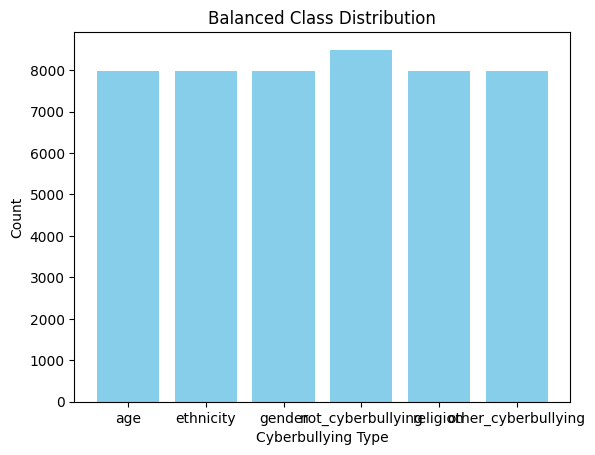

In [ ]:
from sklearn.utils import resample
from collections import Counter
import joblib
import numpy as np



X_resampled_path = "/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl"
y_resampled_path = "/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl"

X_resampled = joblib.load(X_resampled_path)
y_resampled = joblib.load(y_resampled_path)
# Find the minimum class size after resampling
min_class_size = min(Counter(y_resampled).values())

# Separate the 'other_cyberbullying' and the rest of the classes
other_cyberbullying_indices = np.where(y_resampled == 'other_cyberbullying')[0]
other_cyberbullying_data = X_resampled[other_cyberbullying_indices]
other_cyberbullying_labels = y_resampled[other_cyberbullying_indices]

# Undersample 'other_cyberbullying' to match the minimum class size
other_cyberbullying_undersampled, _ = resample(
    other_cyberbullying_data, other_cyberbullying_labels,
    replace=False, n_samples=min_class_size, random_state=42
)

# Combine the undersampled 'other_cyberbullying' data with the rest of the data
X_balanced = np.vstack([X_resampled[y_resampled != 'other_cyberbullying'], other_cyberbullying_undersampled])
y_balanced = np.hstack([y_resampled[y_resampled != 'other_cyberbullying'], np.array([['other_cyberbullying']] * min_class_size).flatten()])

# Check the class distribution after undersampling
from collections import Counter
print("Class distribution after undersampling:")
print(Counter(y_balanced))

# Optionally, visualize the balanced class distribution
import matplotlib.pyplot as plt
label_distribution = Counter(y_balanced)
plt.bar(label_distribution.keys(), label_distribution.values(), color='skyblue')
plt.title('Balanced Class Distribution')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Define the desired class size
target_class_size = 20000

# Step 1: Oversample classes with less than 20,000 entries
oversampler = RandomOverSampler(sampling_strategy={cls: target_class_size for cls, count in Counter(y_resampled).items() if count < target_class_size})
X_oversampled, y_oversampled = oversampler.fit_resample(X_resampled, y_resampled)

# Step 2: Undersample the class with more than 20,000 entries
undersampler = RandomUnderSampler(sampling_strategy={cls: target_class_size for cls, count in Counter(y_oversampled).items() if count > target_class_size})
X_balanced, y_balanced = undersampler.fit_resample(X_oversampled, y_oversampled)

# Step 3: Verify the new class distribution
print("Class distribution after balancing:")
print(Counter(y_balanced))

Class distribution after balancing:
Counter({'age': 20000, 'ethnicity': 20000, 'gender': 20000, 'not_cyberbullying': 20000, 'other_cyberbullying': 20000, 'religion': 20000})


In [ ]:
from joblib import dump

# Define file paths in Google Drive
x_resampled_path = '/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl'
y_resampled_path = '/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl'

# Save the data
dump(X_balanced, x_resampled_path)
print(f"X_balanced saved to {x_resampled_path}")

dump(y_balanced, y_resampled_path)
print(f"y_balanced saved to {y_resampled_path}")

X_balanced saved to /content/drive/MyDrive/Colab Notebooks/X_resampled.pkl
y_balanced saved to /content/drive/MyDrive/Colab Notebooks/y_resampled.pkl


### Final LGBoost Model

In [ ]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
from collections import Counter

# Load the balanced data
X_balanced = joblib.load("/content/drive/MyDrive/Colab Notebooks/X_resampled.pkl")
y_balanced = joblib.load("/content/drive/MyDrive/Colab Notebooks/y_resampled.pkl")

# Print dataset size and category-wise entries
print(f"Total dataset size: {X_balanced.shape[0]}")  # Use shape[0] for the number of rows
print("Entries per category (class distribution):")
print(Counter(y_balanced))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Print training and testing dataset sizes
print(f"Training dataset size: {X_train.shape[0]}")  # Use shape[0] for the number of rows
print(f"Testing dataset size: {X_test.shape[0]}")

# Directory to save the final model
model_dir = "/content/drive/MyDrive/Colab Notebooks"
os.makedirs(model_dir, exist_ok=True)

# Initialize the LGBMClassifier with added parameters
lgbm_model = LGBMClassifier(
    boosting_type='gbdt',
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=1000,
    num_leaves=31,  # Number of leaves in one tree
    min_data_in_leaf=20,  # Minimum number of data points in a leaf (a form of regularization)
    feature_fraction=0.9,  # Randomly select a fraction of features for building each tree
    bagging_fraction=0.8,  # Randomly select a fraction of data for training each tree
    bagging_freq=5,  # Frequency of bagging, to perform bagging every k iterations
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the model with debugging info (using eval_metric and early stopping)
print("Training the LGBM model...")
lgbm_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="multi_logloss",


)

# Evaluate the model on the test set
print("Evaluating the model...")
y_pred = lgbm_model.predict(X_test)

# Print evaluation metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the final trained model
final_model_path = os.path.join(model_dir, "lgboost_model_cyberbullying.pkl")
joblib.dump(lgbm_model, final_model_path)
print(f"Final trained LGBM model saved to {final_model_path}")

Total dataset size: 120000
Entries per category (class distribution):
Counter({'age': 20000, 'ethnicity': 20000, 'gender': 20000, 'not_cyberbullying': 20000, 'other_cyberbullying': 20000, 'religion': 20000})
Training dataset size: 96000
Testing dataset size: 24000
Training the LGBM model...
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightG

In [5]:
import joblib
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

# Load the trained model and vectorizer
model = joblib.load("/content/drive/MyDrive/Colab Notebooks/final_tuned_lgbm_model.pkl")
tfidf_vectorizer = joblib.load("/content/drive/MyDrive/Colab Notebooks/tfidf_vectorizer.pkl")

# Function to predict the class for a new comment
def predict_comment(comment):
    # Transform the input comment using the same TF-IDF vectorizer
    comment_transformed = tfidf_vectorizer.transform([comment])

    # Ensure the number of features is the same by adjusting the comment's feature set
    if comment_transformed.shape[1] != model.feature_importances_.shape[0]:
        print(f"Warning: Feature mismatch. Adjusting feature count.")
        # Pad or truncate the features to match the model's expected number
        comment_transformed = np.hstack([comment_transformed.toarray(),
                                         np.zeros((comment_transformed.shape[0], model.feature_importances_.shape[0] - comment_transformed.shape[1]))])

    # Predict the class using the model
    predicted_class = model.predict(comment_transformed)
    return predicted_class[0]

# Start the prediction loop
while True:
    comment = input("Enter a comment for prediction (type 'exit' to quit): ")

    if comment.lower() == 'exit':
        print("Exiting the prediction loop. Goodbye!")
        break

    # Predict the class of the comment
    predicted_label = predict_comment(comment)
    print(f"The predicted label for the comment is: {predicted_label}")

Enter a comment for prediction (type 'exit' to quit): gay
The predicted label for the comment is: other_cyberbullying
Enter a comment for prediction (type 'exit' to quit): rape
The predicted label for the comment is: gender
Enter a comment for prediction (type 'exit' to quit): You know there are people out there who like @joeyBADASS_ but don't listen to old school.
The predicted label for the comment is: not_cyberbullying
Enter a comment for prediction (type 'exit' to quit): The Muslim Brotherhood President of Egypt was removed in 2013 by Obama... You guys are idiots.
The predicted label for the comment is: other_cyberbullying
Enter a comment for prediction (type 'exit' to quit): Karma. I hope it bites Kat on the butt. She is just nasty. #mkr
The predicted label for the comment is: gender
Enter a comment for prediction (type 'exit' to quit): Do you normally call people that cite the law a bitch, or do you just refer to females in general as bitches?
The predicted label for the comment 